In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel('netflix3.xlsx')
df = data.copy()

In [4]:
df.head()

,Name,Year,Age Rating,Duration,Category,
0,The Sea Beast,2022.0,7+,1h 59m,Kids & Family Movies,NaN
1,Sonic the Hedgehog,2020.0,7+,1h 41m,Kids & Family Movies,NaN
2,Tom and Jerry,2021.0,7+,1h 41m,Kids & Family Movies,NaN
3,We Can Be Heroes,2020.0,7+,1h 40m,Kids & Family Movies,NaN
4,STAND BY ME Doraemon 2,2020.0,7+,1h 37m,Kids & Family Movies,NaN


In [5]:
df.columns

Index(['Name', 'Year', 'Age Rating', 'Duration', 'Category', ' '], dtype='object')

In [6]:
df.drop(' ', axis=1, inplace=True)

In [7]:
df.head()

,Name,Year,Age Rating,Duration,Category
0,The Sea Beast,2022.0,7+,1h 59m,Kids & Family Movies
1,Sonic the Hedgehog,2020.0,7+,1h 41m,Kids & Family Movies
2,Tom and Jerry,2021.0,7+,1h 41m,Kids & Family Movies
3,We Can Be Heroes,2020.0,7+,1h 40m,Kids & Family Movies
4,STAND BY ME Doraemon 2,2020.0,7+,1h 37m,Kids & Family Movies


In [8]:
df.columns

Index(['Name', 'Year', 'Age Rating', 'Duration', 'Category'], dtype='object')

In [9]:
df.dtypes

Name           object
Year          float64
Age Rating     object
Duration       object
Category       object
dtype: object

In [10]:
df.isnull().sum()

Name           1
Year          25
Age Rating    25
Duration       1
Category       2
dtype: int64

In [11]:
df.dropna(inplace=True)


In [12]:
df.isnull().sum()

Name          0
Year          0
Age Rating    0
Duration      0
Category      0
dtype: int64

In [13]:
df = df.dropna(subset=['Name', 'Year', 'Age Rating', 'Duration', 'Category'])
df

,Name,Year,Age Rating,Duration,Category
0,The Sea Beast,2022.0,7+,1h 59m,Kids & Family Movies
1,Sonic the Hedgehog,2020.0,7+,1h 41m,Kids & Family Movies
2,Tom and Jerry,2021.0,7+,1h 41m,Kids & Family Movies
3,We Can Be Heroes,2020.0,7+,1h 40m,Kids & Family Movies
4,STAND BY ME Doraemon 2,2020.0,7+,1h 37m,Kids & Family Movies
...,...,...,...,...,...
2724,Mom,2017.0,16+,2h 18m,Dramas
2725,The Legend of Bhagat Singh,2002.0,16+,2h 35m,Movies Based on Real Life
2726,Article 15,2019.0,16+,2h 5m,Dramas
2727,We Are Family,2010.0,13+,1h 58m,Dramas


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2703 entries, 0 to 2728
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        2703 non-null   object 
 1   Year        2703 non-null   float64
 2   Age Rating  2703 non-null   object 
 3   Duration    2703 non-null   object 
 4   Category    2703 non-null   object 
dtypes: float64(1), object(4)
memory usage: 126.7+ KB


In [15]:
category_distribution = df['Category'].value_counts()
print(category_distribution.to_string())

Comedies                          457
Dramas                            294
Thriller Movies                   242
Kids & Family Movies              222
Action & Adventure                222
Romantic Movies                   199
Horror Movies                     151
Hindi-Language Movies              93
Family Movies                      70
Movies Based on Books              68
Sports Movies                      64
Anime Movies                       62
Documentary Films                  57
Teen Movies                        49
Movies Based on Real Life          47
Military Movies                    40
Sci-Fi Movies                      38
Crime Movies                       33
US Movies                          26
Music                              22
Tamil-Language Movies              20
Chinese Movies                     20
Bollywood Movies                   18
Social Issue Dramas                16
Telugu-Language Movies             12
True Crime Documentaries           11
Spy Movies  

Age Ratings: ['7+' 'All' '16+' '13+' '18+' 'TV-MA' '16' '12' '14']


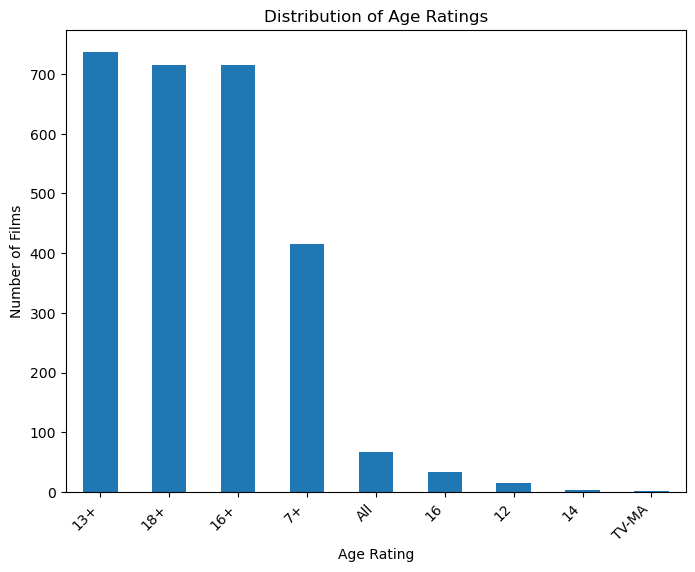

In [16]:
# Check the 'Age Rating' column
age_ratings = df['Age Rating'].unique()
print("Age Ratings:", age_ratings)

# Calculate the distribution of age ratings
age_rating_distribution = df['Age Rating'].value_counts()

# Create the plot
plt.figure(figsize=(8, 6))
age_rating_distribution.plot(kind='bar')
plt.xlabel('Age Rating')
plt.ylabel('Number of Films')
plt.title('Distribution of Age Ratings')
plt.xticks(rotation=45, ha='right')
plt.show()


Years: [2022. 2020. 2021. 2019. 2016. 2010. 2008. 1996. 2015. 2005. 2011. 2017.
 2004. 2018. 2006. 2012. 2001. 1999. 2009. 1994. 1986. 2014. 2007. 2013.
 1988. 1989. 1995. 2002. 1991. 1984. 2003. 1993. 1998. 1980. 1997. 2000.
 1961. 1963. 1975. 1981. 1982. 1985. 1990. 1992. 1958. 1978. 1983. 1979.
 1954. 1977.]


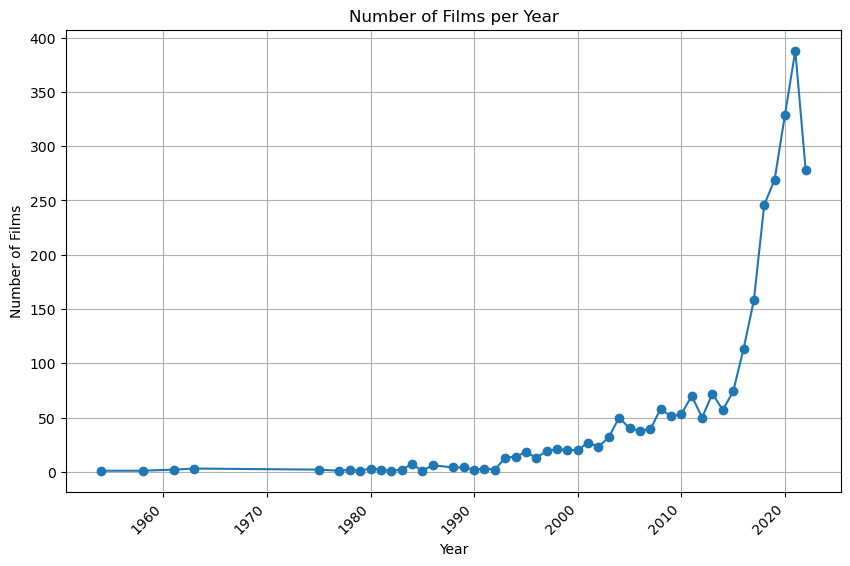

In [17]:
# Check the 'Year' column
years = df['Year'].unique()
print("Years:", years)

# Calculate the number of films per year
film_count = df['Year'].value_counts().sort_index()

# Create the plot
plt.figure(figsize=(10, 6))
film_count.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Films')
plt.title('Number of Films per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


In [18]:
# Separate the 'Duration' column into hours and minutes
df['Duration_hours'] = df['Duration'].str.extract('(\d+)h').astype(float)
df['Duration_minutes'] = df['Duration'].str.extract('(\d+)m').astype(float)

# Convert the durations to minutes
df['Duration_total_minutes'] = df['Duration_hours'] * 60 + df['Duration_minutes']

# Drop rows with missing values in 'Duration'
df.dropna(subset=['Duration'], inplace=True)

# Find the film(s) with the longest duration
longest_duration = df['Duration_total_minutes'].max()
longest_films = df[df['Duration_total_minutes'] == longest_duration]
print("Longest film(s):")
print(longest_films)


Longest film(s):
        Name    Year Age Rating Duration         Category  Duration_hours  \
269   Lagaan  2001.0        13+   3h 43m  Romantic Movies             3.0   
1900  Lagaan  2001.0        13+   3h 43m    Sports Movies             3.0   
2617  Lagaan  2001.0        13+   3h 43m           Dramas             3.0   

      Duration_minutes  Duration_total_minutes  
269               43.0                   223.0  
1900              43.0                   223.0  
2617              43.0                   223.0  


In [25]:

shortest_duration = df['Duration_total_minutes'].min()
shortest_films = df[df['Duration_total_minutes'] == shortest_duration]
print("Duration shortest films:")
print(shortest_films)


Duration shortest films:
                                              Name    Year Age Rating  \
149   Go! Go! Cory Carson: Chrissy Takes the Wheel  2021.0        All   
1996                     Azzurri - Road to Wembley  2021.0        13+   
2339            Kevin Hart: I'm a Grown Little Man  2009.0        18+   

     Duration              Category  Duration_hours  Duration_minutes  \
149     1h 1m  Kids & Family Movies             1.0               1.0   
1996    1h 1m         Sports Movies             1.0               1.0   
2339    1h 1m       Stand-Up Comedy             1.0               1.0   

      Duration_total_minutes  
149                     61.0  
1996                    61.0  
2339                    61.0  


In [20]:
lagaan_films = df[df['Name'] == 'Lagaan']


In [21]:
categories = lagaan_films['Category'].unique()


In [22]:
for category in categories:
    count = lagaan_films[lagaan_films['Category'] == category].shape[0]
    print(f"Category: {category} - Count: {count}")


Category: Romantic Movies - Count: 1
Category: Sports Movies - Count: 1
Category: Dramas - Count: 1
